# Week 4 -Nonlinear Optimization and Optimization Frameworks

## 1.a Solving Himmelblau Problem

The Himmelblau Problem is defined as the following constrained optimization problem:

$\begin{array}{ll}\min _{x_1, x_2} & f\left(x_1, x_2\right)=\left(x_1^2+x_2-11\right)^2+\left(x_1+x_2^2-7\right)^2 \\ \text { s.t. } & c_1\left(x_1, x_2\right)=\left(x_1+2\right)^2-x_2 \geq 0 \\ & c_2\left(x_1, x_2\right)=-4 x_1+10 x_2 \geq 0\end{array}$

In [1]:
import time
import numpy as np
from scipy.optimize import minimize

# Objective function
def objective(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Constraints
def constraint1(x):
    return (x[0] + 2)**2 - x[1]

def constraint2(x):
    return -4*x[0] + 10*x[1]

# Initial guess
x0 = [0, 0]

# Define constraints dictionary
cons = [{'type': 'ineq', 'fun': constraint1},
        {'type': 'ineq', 'fun': constraint2}]

# Solve the problem
start = time.time()
solution = minimize(objective, x0, method='trust-constr', constraints=cons)
end = time.time()

# Print solution and objective value
print(f"Solution: {solution.x}")
print(f"Objective value: {solution.fun}")

# Print Lagrange multipliers
# The 'v' attribute of 'solution.optimality' contains the Lagrange multipliers
"""
From scipy documentation:
v is a list of the Lagrange multipliers for the constraints at the solution. 
For an inequality constraint a positive multiplier means that the upper bound is active, 
a negative multiplier means that the lower bound is active and if a multiplier is zero 
it means the constraint is not active.
"""
if 'v' in solution:
    print(f"Lagrange multipliers: {np.concatenate(solution['v']).flatten()}")
else:
    print("Lagrange multipliers not available.")

print(f"Time to solve: {end-start} seconds")
print(f"Number of iterations: {solution.nit}")

Solution: [2.99999958 2.00000137]
Objective value: 2.6851711499190163e-11
Lagrange multipliers: [-1.39112804e-06 -4.00028564e-06]
Time to solve: 0.027849674224853516 seconds
Number of iterations: 18


/home/william/.cache/pypoetry/virtualenvs/copti-U-I_7R90-py3.10/lib/python3.10/site-packages/scipy/optimize/_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


If we provide the gradient beforehand

In [2]:
import time
import numpy as np
from scipy.optimize import minimize

# Objective function
def objective(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Gradient of the objective function
def grad(x):
    return np.array([4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7),
                     2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)])

# Constraints
def constraint1(x):
    return (x[0] + 2)**2 - x[1]

def constraint2(x):
    return -4*x[0] + 10*x[1]

# Initial guess
x0 = [0, 0]

# Define constraints dictionary
cons = [{'type': 'ineq', 'fun': constraint1},
        {'type': 'ineq', 'fun': constraint2}]

# Solve the problem
start = time.time()
solution = minimize(objective, x0, method='trust-constr', constraints=cons, jac=grad)
end = time.time()

# Print solution and objective value
print(f"Solution: {solution.x}")
print(f"Objective value: {solution.fun}")

# Print Lagrange multipliers
# The 'v' attribute of 'solution.optimality' contains the Lagrange multipliers
"""
From scipy documentation:
v is a list of the Lagrange multipliers for the constraints at the solution. 
For an inequality constraint a positive multiplier means that the upper bound is active, 
a negative multiplier means that the lower bound is active and if a multiplier is zero 
it means the constraint is not active.
"""
if 'v' in solution:
    print(f"Lagrange multipliers: {np.concatenate(solution['v']).flatten()}")
else:
    print("Lagrange multipliers not available.")

print(f"Time to solve: {end-start} seconds")
print(f"Number of iterations: {solution.nit}")

Solution: [2.9999996  2.00000137]
Objective value: 2.686790502061284e-11
Lagrange multipliers: [-1.39112802e-06 -4.00028569e-06]
Time to solve: 0.034470558166503906 seconds
Number of iterations: 18


Now let's also provide the hessian

In [3]:
import time
import numpy as np
from scipy.optimize import minimize

# Objective function
def objective(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Gradient of the objective function
def grad(x):
    return np.array([4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7),
                     2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)])

# Hessian of the objective function
def hess(x):
    return np.array([[12*x[0]**2 + 4*x[1] - 42, 4*x[0] + 4*x[1]],
                     [4*x[0] + 4*x[1], 4*x[0] + 12*x[1]**2 - 26]])


# Constraints
def constraint1(x):
    return (x[0] + 2)**2 - x[1]

def constraint2(x):
    return -4*x[0] + 10*x[1]

# Initial guess
x0 = [0, 0]

# Define constraints dictionary
cons = [{'type': 'ineq', 'fun': constraint1},
        {'type': 'ineq', 'fun': constraint2}]

# Solve the problem
start = time.time()
solution = minimize(objective, x0, method='trust-constr', constraints=cons, jac=grad, hess=hess)
end = time.time()

# Print solution and objective value
print(f"Solution: {solution.x}")
print(f"Objective value: {solution.fun}")

# Print Lagrange multipliers
# The 'v' attribute of 'solution.optimality' contains the Lagrange multipliers
"""
From scipy documentation:
v is a list of the Lagrange multipliers for the constraints at the solution. 
For an inequality constraint a positive multiplier means that the upper bound is active, 
a negative multiplier means that the lower bound is active and if a multiplier is zero 
it means the constraint is not active.
"""
if 'v' in solution:
    print(f"Lagrange multipliers: {np.concatenate(solution['v']).flatten()}")
else:
    print("Lagrange multipliers not available.")

print(f"Time to solve: {end-start} seconds")
print(f"Number of iterations: {solution.nit}")

Solution: [2.9999996  2.00000137]
Objective value: 2.6863266065252152e-11
Lagrange multipliers: [-1.39130629e-06 -4.00007246e-06]
Time to solve: 0.0377812385559082 seconds
Number of iterations: 18


Let's look at different tolerance levels

Tolerance: 0.1
Solution: [2.99883059 2.00408784]
Lagrange multipliers: [-0.00436121 -0.01217983]
Tolerance: 0.001
Solution: [2.99974622 2.00087144]
Lagrange multipliers: [-0.00087023 -0.00252451]
Tolerance: 1e-06
Solution: [2.99999003 2.00003428]
Lagrange multipliers: [-3.47838316e-05 -1.00045770e-04]
Tolerance: 1e-09
Solution: [2.9999996  2.00000137]
Lagrange multipliers: [-1.39130629e-06 -4.00007246e-06]


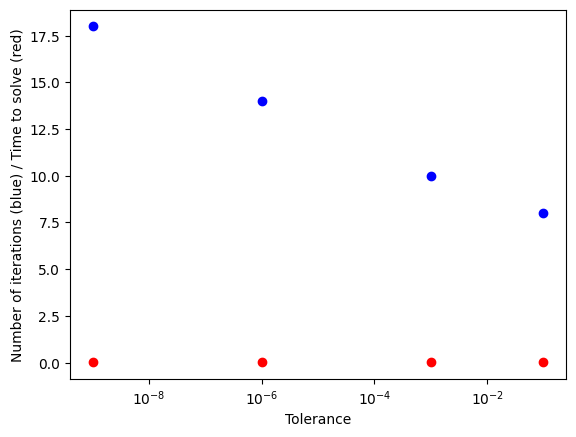

In [8]:
import time
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Objective function
def objective(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Gradient of the objective function
def grad(x):
    return np.array([4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7),
                     2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)])

# Hessian of the objective function
def hess(x):
    return np.array([[12*x[0]**2 + 4*x[1] - 42, 4*x[0] + 4*x[1]],
                     [4*x[0] + 4*x[1], 4*x[0] + 12*x[1]**2 - 26]])


# Constraints
def constraint1(x):
    return (x[0] + 2)**2 - x[1]

def constraint2(x):
    return -4*x[0] + 10*x[1]

# Initial guess
x0 = [0, 0]

# Define constraints dictionary
cons = [{'type': 'ineq', 'fun': constraint1},
        {'type': 'ineq', 'fun': constraint2}]

# Solve the problem for different tolerance values and plot the number of iterations and the time to solve
for tol in [1e-1, 1e-3, 1e-6, 1e-9]:
    start = time.time()
    solution = minimize(objective, x0, method='trust-constr', constraints=cons, jac=grad, hess=hess, tol=tol)
    end = time.time()

    print(f"Tolerance: {tol}")
    print(f"Solution: {solution.x}")
    if 'v' in solution:
        print(f"Lagrange multipliers: {np.concatenate(solution['v']).flatten()}")

    plt.plot(tol, solution.nit, 'bo')
    plt.plot(tol, end-start, 'ro')

plt.xscale('log')
plt.xlabel('Tolerance')
plt.ylabel('Number of iterations (blue) / Time to solve (red)')
plt.show()

We see that increasing the tolerance significantly decreases the number of iterations.

The solutions are still similar.

However the Lagrange multipliers very a lot.

Let's look at the time and number of iterations for the different minimization methods

          Method  Iterations      Time  \
1         Powell           7  0.008744   
10   trust-exact           7  0.002387   
4      Newton-CG           8  0.002552   
2             CG           9  0.004165   
6            TNC           9  0.002869   
9      trust-ncg           9  0.001603   
11  trust-krylov           9  0.002971   
3           BFGS          10  0.003203   
5       L-BFGS-B          10  0.002136   
7          SLSQP          10  0.008243   
8   trust-constr          18  0.043626   
0    Nelder-Mead          81  0.006494   

                                    Solution  
1                                 [3.0, 2.0]  
10  [2.9999998849232234, 2.0000005205534865]  
4     [2.9999999999998805, 2.00000000000055]  
2      [2.9999999267768, 1.9999999915190705]  
6     [2.999999400598609, 2.000000856932965]  
9   [2.9999999129285158, 2.0000003701500466]  
11   [2.9999998453658803, 2.000000708961311]  
3   [2.9999999477827064, 1.9999999956937438]  
5   [2.9999999970623645, 1.999

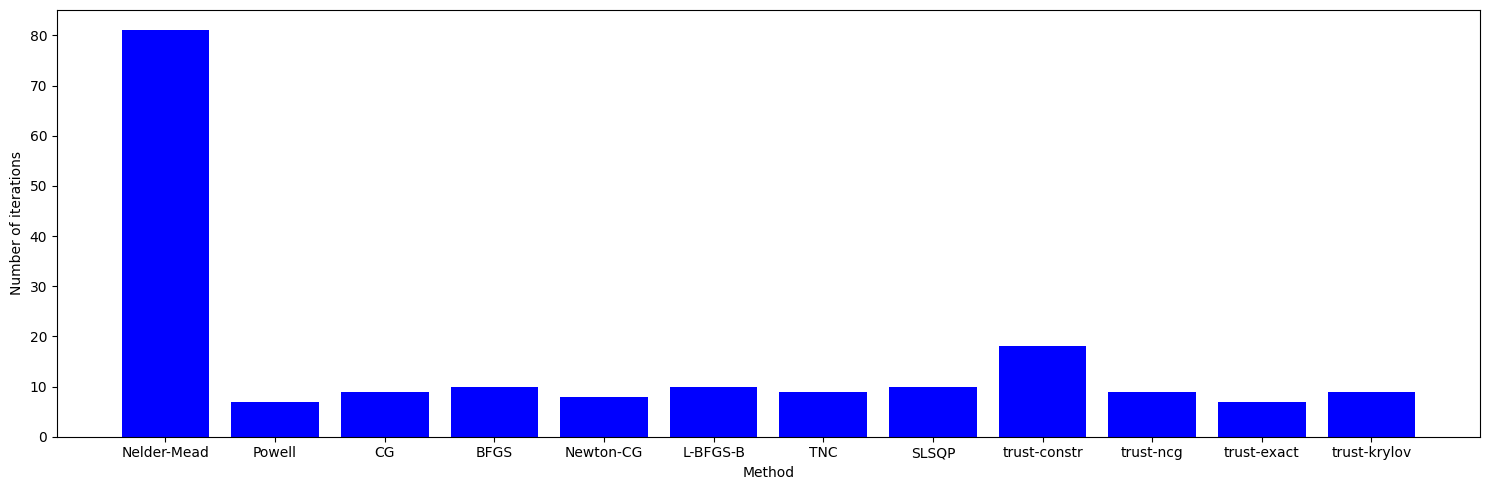

In [23]:
import time
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

#suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Objective function
def objective(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Gradient of the objective function
def grad(x):
    return np.array([4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7),
                     2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)])

# Hessian of the objective function
def hess(x):
    return np.array([[12*x[0]**2 + 4*x[1] - 42, 4*x[0] + 4*x[1]],
                     [4*x[0] + 4*x[1], 4*x[0] + 12*x[1]**2 - 26]])


# Constraints
def constraint1(x):
    return (x[0] + 2)**2 - x[1]

def constraint2(x):
    return -4*x[0] + 10*x[1]

# Initial guess
x0 = [0, 0]

# Define constraints dictionary
cons = [{'type': 'ineq', 'fun': constraint1},
        {'type': 'ineq', 'fun': constraint2}]

# Solve the problem for optimization methods and plot the number of iterations and the time to solve
solvers = [
    'Nelder-Mead',
    'Powell',
    'CG',
    'BFGS',
    'Newton-CG',
    'L-BFGS-B',
    'TNC',
    'COBYLA',
    'SLSQP',
    'trust-constr',
    'trust-ncg',
    'trust-exact',
    'trust-krylov'
]


plt.figure(figsize=(15, 5))
results = {'Method': [], 'Iterations': [], 'Time': [], 'Solution': []}
for method in solvers:
    start = time.time()
    solution = minimize(objective, x0, method=method, constraints=cons, jac=grad, hess=hess)
    end = time.time()

    if 'nit' in solution:
        results['Method'].append(method)
        results['Iterations'].append(solution.nit)
        results['Time'].append(end-start)
        results['Solution'].append(solution.x)

        #plot as bar chart
        plt.bar(method, solution.nit, color='blue')

df = pd.DataFrame(results)
df = df.sort_values(by='Iterations')
print(df)

plt.xlabel('Method')
plt.ylabel('Number of iterations')
plt.tight_layout()
plt.show()

## Quadprog

We consider the problem:

Objective: Minimize the quadratic function $f(x)=\frac{1}{2} x^T H x+g^T x$

Constraints: Subject to $A x \leq b$

- Where:
\begin{align*}
\begin{aligned}
& H=\left[\begin{array}{ll}
2 & 1 \\
1 & 2
\end{array}\right], \\
& g=\left[\begin{array}{l}
-2 \\
-5
\end{array}\right], \\
& A=\left[\begin{array}{cc}
1 & 2 \\
1 & -4 \\
-5 & -1
\end{array}\right], \\
& b=\left[\begin{array}{l}
-2 \\
-3 \\
-2
\end{array}\right] .
\end{aligned}
\end{align*}

In [35]:
from scipy.optimize import minimize

H = np.array([[2,1], 
              [1, 2]])

g = np.array([[-2],
              [-5]])

A = np.array([[1, 2],
              [1, -4],
              [-5, -1]])

b = np.array([[-2],
              [-3],
              [-2]])

# Objective function
def f(x):
    return 0.5 * x.T @ H @ x + g.T @ x

x0 = np.array([0, 0])

# Solve the problem
solution = minimize(f, x0, method="trust-constr", constraints={'type': 'ineq', 'fun': lambda x: A @ x - b.reshape(-1)})
solution

           message: `gtol` termination condition is satisfied.
           success: True
            status: 1
               fun: -3.6187276426708492
                 x: [ 2.380e-01  8.094e-01]
               nit: 14
              nfev: 30
              njev: 10
              nhev: 0
          cg_niter: 10
      cg_stop_cond: 1
              grad: [-7.146e-01 -3.143e+00]
   lagrangian_grad: [-7.405e-14 -5.049e-13]
            constr: [array([ 3.857e+00,  2.240e-04,  5.599e-04])]
               jac: [array([[ 1.000e+00,  2.000e+00],
                           [ 1.000e+00, -4.000e+00],
                           [-5.000e+00, -1.000e+00]])]
       constr_nfev: [30]
       constr_njev: [0]
       constr_nhev: [0]
                 v: [array([-4.148e-05, -7.144e-01, -2.858e-01])]
            method: tr_interior_point
        optimality: 5.049294315995212e-13
  constr_violation: 0.0
    execution_time: 0.05204033851623535
         tr_radius: 4486.286225995907
    constr_penalty: 1.0
 barrier_

## Linprog

We consider the problem:

\begin{array}{ll}
\min _{x_1, x_2} & f\left(x_1, x_2\right)=-\frac{x_1+x_2}{3} \\
\text { s.t. } & x_1+x_2 \leq 2 \\
& x_1+\frac{x_2}{4} \leq 1 \\
& x_1-x_2 \leq 2 \\
& -\frac{x_1}{4}-x_2 \leq 1 \\
& -x_1-x_2 \leq-1 \\
& -x_1+x_2 \leq 2
\end{array}

In [38]:
import numpy as np
from scipy.optimize import linprog

c = np.array([-1, -1/3])

# Define the A matrix for constraints
A = np.array([
    [1, 1],     # x1 + x2 <= 2
    [1, 0.25],  # x1 + x2/4 <= 1
    [1, -1],    # x1 - x2 <= 2
    [-0.25, -1],# -x1/4 - x2 <= 1
    [-1, -1],   # -x1 - x2 <= -1
    [-1, 1]     # -x1 + x2 <= 2
])

# Define the b vector for constraints
b = np.array([2, 1, 2, 1, -1, 2])

x0 = np.array([0, 0])

solution = linprog(c, A_ub=A, b_ub=b)
solution

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -1.1111111111111112
              x: [ 6.667e-01  1.333e+00]
            nit: 2
          lower:  residual: [ 6.667e-01  1.333e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  2.667e+00  2.500e+00
                              1.000e+00  1.333e+00]
                 marginals: [-1.111e-01 -8.889e-01 -0.000e+00 -0.000e+00
                             -0.000e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [39]:
import numpy as np
from scipy.optimize import linprog

c = np.array([-5, -4, -6])

A = np.array([[1, -1, 1],
            [3, 2, 4],
            [3, 2, 0]])

b = np.array([20, 42, 30])

solution = linprog(c=c, A_ub=A, b_ub=b, bounds=[(0, None), (0, None), (0, None)])
solution

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -78.0
              x: [ 0.000e+00  1.500e+01  3.000e+00]
            nit: 2
          lower:  residual: [ 0.000e+00  1.500e+01  3.000e+00]
                 marginals: [ 1.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 3.200e+01  0.000e+00  0.000e+00]
                 marginals: [-0.000e+00 -1.500e+00 -5.000e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

We see the Lagrange Multipliers as the `marginals` for the `eqlin` and `ineqlin`